## Landmark-preserve Horizontal Flip

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
from transforms import FaceHorizontalFlip, ToTensorV3, CenterCropV2

In [33]:
augmentation = A.Compose([
    A.RandomBrightness(limit=0.2, p=0.5),
    A.RandomContrast(limit=0.2, p=0.5),
    A.Blur(blur_limit=3, p=0.5),
    A.Resize(128, 128),
#     A.CenterCrop(256, 256),
#     FaceHorizontalFlip(p=1.0),
#     A.Rotate(border_mode=cv2.BORDER_CONSTANT, limit=20, p=0.8),
#     ToTensorV3()
], keypoint_params=A.KeypointParams(format='xy'))

In [19]:
landmarks_pd = pd.read_csv('data/train/landmarks.csv', delimiter='\t')

In [34]:
file = '84568698e446d81169de39299375175d.jpg'
landmarks_pd.loc[landmarks_pd.file_name == file].drop('file_name', axis=1).values

array([[230, 338, 226, ..., 164, 198, 157]])

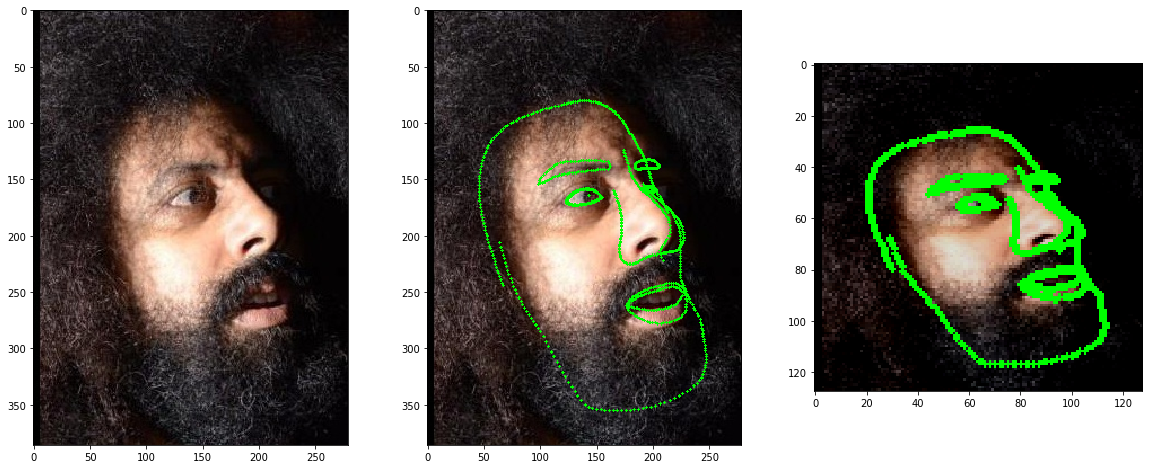

In [35]:
file = '84568698e446d81169de39299375175d.jpg'
landmarks = landmarks_pd.loc[landmarks_pd.file_name == file].drop('file_name', axis=1).values
landmarks = landmarks.reshape(971, 2)
path = f'data/train/images/{file}'

# source image
src = cv2.imread(path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# source image with landmarks
src_landm = src.copy()
for i, (x, y) in enumerate(landmarks):
    cv2.circle(src_landm, (int(x), int(y)), 1, (0, 255, 0), -1)

# x-flipped image with landmarks
src_flipx = augmentation(image=src, keypoints=landmarks)
for i, (x, y) in enumerate(src_flipx['keypoints']):
    cv2.circle(src_flipx['image'], (int(x), int(y)), 1, (0, 255, 0), -1)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
axes[0].imshow(src)
axes[1].imshow(src_landm)
axes[2].imshow(src_flipx['image'])
plt.show()

In [36]:
len(src_flipx['keypoints'])

971

In [32]:
src_flipx['image'].shape

(128, 93, 3)

In [12]:
src_flipx = augmentation(image=src, keypoints=landmarks)

In [7]:
from utils import restore_landmarks_batch

In [85]:
restored = restore_landmarks_batch(np.array(src_flipx['keypoints'])[None], np.array(src.shape)[None], 128)

In [87]:
restored

array([[[162.       , 308.8359375],
        [159.       , 308.8359375],
        [156.       , 308.8359375],
        ...,
        [123.       , 251.8359375],
        [112.       , 160.8359375],
        [191.       , 163.8359375]]])

In [89]:
((restored.reshape(-1) - landmarks.reshape(-1))**2).mean()

2.3415832519531254

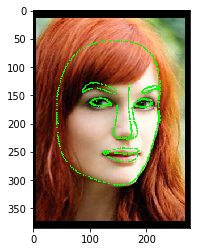

In [86]:
src_landm = src.copy()
for i, (x, y) in enumerate(restored[0]):
    cv2.circle(src_landm, (int(x), int(y)), 1, (0, 255, 0), -1)
plt.imshow(src_landm)

In [83]:
def restore_landmarks_batch(landmarks, original_shapes, crop_size=128):
    fs = compute_fs(original_shapes, crop_size)
    margins_x, margins_y = compute_margins(original_shapes * fs, crop_size)
    
    landmarks[:, :, 0] += margins_x[:, None]
    landmarks[:, :, 1] += margins_y[:, None]
    landmarks /= fs[:, None, None]
    return landmarks

def compute_margins(original_shape, crop_size=128):
    margins_x = (original_shape[:, 1] - crop_size) // 2
    margins_y = (original_shape[:, 0] - crop_size) // 2
    return margins_x, margins_y


def compute_fs(original_shape, crop_size=128):
    min_side = np.min(original_shape[:, :2], axis=1)
    fs = crop_size / min_side
    return fs

In [14]:
augmentation = A.Compose([
    FaceHorizontalFlip(p=1.0),
    A.RandomBrightness(limit=0.2, p=0.5),
    A.RandomContrast(limit=0.2, p=0.5),
    A.Blur(blur_limit=3, p=0.5),
    A.Rotate(border_mode=cv2.BORDER_CONSTANT, limit=20, p=0.8),
])

In [16]:
src_flipx

{'image': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8)}